# easyDiffractionLib walkthrough

In [1]:
import numpy as np
from easyDiffractionLib import Crystal
from easyDiffractionLib.sample import Sample
from easyDiffractionLib.interface import InterfaceFactory
from easyDiffractionLib.Elements.Instruments.Instrument import Pattern

## Working with CIF files

We can load a cif file from the disk to create a `Crystal` object.  

In [2]:
phase = Crystal.from_cif_file('SrTiO3.cif')

We can check that it has loaded the cell:

In [3]:
print(phase.cell)

<Cell: (a: 5.52 Å, b: 5.52 Å, c: 7.81Å, alpha: 90.00 deg, beta: 90.00 deg, gamma: 90.00 deg>


### Interfacing with a calculator

By default we are using the CrysFML calculator. We can start an interface with the interface factory

In [4]:
interface = InterfaceFactory()
print(interface.current_interface_name)

CrysFML


Before we can simulate a pattern we have to create a `Pattern` with instrumental parameters. At the moment this is just the wavelength and resolution parameters

In [5]:
pattern = Pattern.default()

### Simulating a pattern

In [6]:
sample = Sample(phases=phase, parameters=pattern, interface=interface)

We can define a 2-theta range and simulate

In [7]:
ttheta = np.linspace(5, 150, 1000)
intensity = interface.fit_func(ttheta)

And plot it:

<IPython.core.display.Javascript object>


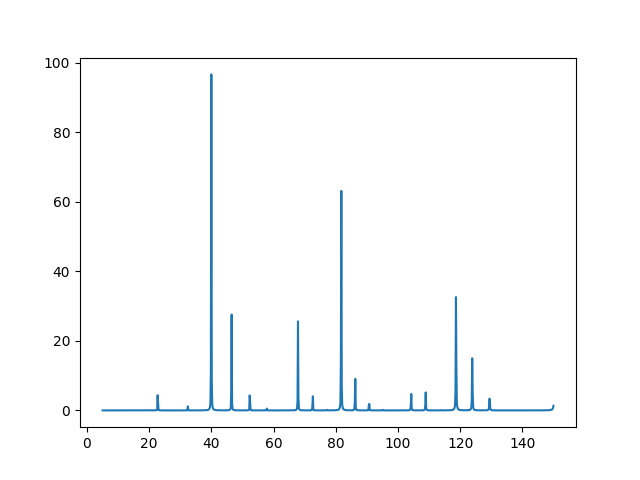

In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(ttheta, intensity)

# Starting from Scratch

In [9]:
from easyDiffractionLib import Cell, Site, Atoms, SpaceGroup

Now we are going to make all the components of a phase. All classes have a `from_pars` and `default` option for ease of creation.

In [10]:
# Create a cell by parameters
cell = Cell.from_pars(7, 7, 7, 90, 90, 90)
# Create a default spacegroup. This will be P1 by default.
sg = SpaceGroup.default()
# Now create some atoms to add to the `Atoms` object. Note that any names can be excluded.
atom1 = Site.from_pars(label='Fe', specie='Fe3+', fract_x=0, fract_y=0.25, fract_z=0.25)
# The site default creator puts an atom at (0, 0, 0) and needs a unique label and a specie.
atom2 = Site.default('Cu', 'Cu2+')
atoms = Atoms('my_atoms', atom1, atom2)

# A new phase has to have a label
new_phase = Crystal('strangeComposition', spacegroup=sg, cell=cell, atoms=atoms)

This `new_phase` can now be used for generating a pattern

<IPython.core.display.Javascript object>


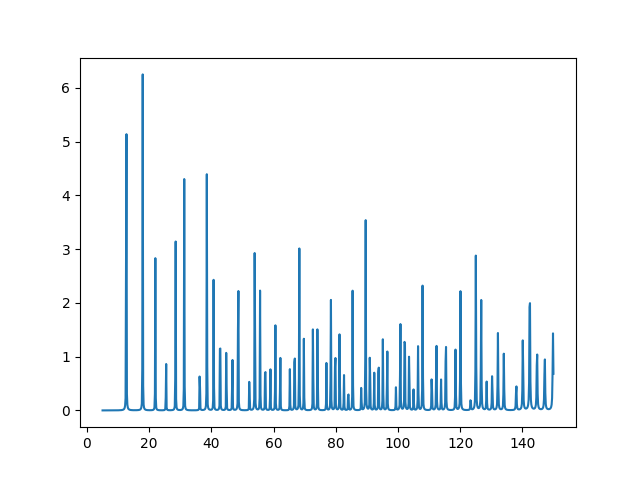

In [11]:
# We can generate a sample without a phase and add it later
sample_new = Sample(parameters=pattern, interface=interface)
sample_new.phases = new_phase

# Plotting the results
intensity = interface.fit_func(ttheta)
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(ttheta, intensity)

We can even play around with any parameter i.e.wavelength

In [17]:
%matplotlib inline
from ipywidgets import interactive

def f(wavelength):
    sample_new.parameters.wavelength = wavelength
    plt.figure()
    plt.plot(ttheta, interface.fit_func(ttheta))
    plt.show()

interactive_plot = interactive(f, wavelength=(1, 5))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=3, description='wavelength', max=5, min=1), Output()), _dom_classes=('wi…

#### Getting and modifying parameters

We can see what parameters we can play around with:

In [12]:
# We can get the parameters with:
pars = sample.get_parameters()
print(pars)

[<Parameter 'length_a': 5.5202+/-0 Å (fixed), bounds=[0:inf]>, <Parameter 'length_b': 5.5202+/-0 Å (fixed), bounds=[0:inf]>, <Parameter 'length_c': 7.8067+/-0 Å (fixed), bounds=[0:inf]>, <Parameter 'angle_alpha': 90.0000+/-0 deg (fixed), bounds=[0:inf]>, <Parameter 'angle_beta': 90.0000+/-0 deg (fixed), bounds=[0:inf]>, <Parameter 'angle_gamma': 90.0000+/-0 deg (fixed), bounds=[0:inf]>, <Parameter 'occupancy': 1.0000+/-0 (fixed), bounds=[-inf:inf]>, <Parameter 'fract_x': 0.0000+/-0 (fixed), bounds=[-inf:inf]>, <Parameter 'fract_y': 0.0000+/-0 (fixed), bounds=[-inf:inf]>, <Parameter 'fract_z': 0.2500+/-0 (fixed), bounds=[-inf:inf]>, <Parameter 'Uiso': 0.0061+/-0 Å² (fixed), bounds=[0:inf]>, <Parameter 'occupancy': 1.0000+/-0 (fixed), bounds=[-inf:inf]>, <Parameter 'fract_x': 0.5000+/-0 (fixed), bounds=[-inf:inf]>, <Parameter 'fract_y': 0.0000+/-0 (fixed), bounds=[-inf:inf]>, <Parameter 'fract_z': 0.0000+/-0 (fixed), bounds=[-inf:inf]>, <Parameter 'Uiso': 0.0051+/-0 Å² (fixed), bounds=[0

But this isn't very helpful. To make it more visually appealing:

In [14]:
from easyCore.Utils.classTools import generatePath
_, par_path = generatePath(sample_new, True)
print('\n'.join(par_path))

Phases.strangeComposition.cell.length_a
Phases.strangeComposition.cell.length_b
Phases.strangeComposition.cell.length_c
Phases.strangeComposition.cell.angle_alpha
Phases.strangeComposition.cell.angle_beta
Phases.strangeComposition.cell.angle_gamma
Phases.strangeComposition.my_atoms.Fe.occupancy
Phases.strangeComposition.my_atoms.Fe.fract_x
Phases.strangeComposition.my_atoms.Fe.fract_y
Phases.strangeComposition.my_atoms.Fe.fract_z
Phases.strangeComposition.my_atoms.Cu.occupancy
Phases.strangeComposition.my_atoms.Cu.fract_x
Phases.strangeComposition.my_atoms.Cu.fract_y
Phases.strangeComposition.my_atoms.Cu.fract_z
Instrument.u_resolution
Instrument.v_resolution
Instrument.w_resolution
Instrument.x_resolution
Instrument.wavelength


Of course, sometimes we want to only get certain parameters i.e. instrumental only:

In [15]:
_, par_path = generatePath(sample_new.parameters)
# Note the lack of `True` in the above call. 
# This is an optional logical parameter which can cut off the head node.
print('\n'.join(par_path))

Instrument.u_resolution
Instrument.v_resolution
Instrument.w_resolution
Instrument.x_resolution
Instrument.wavelength


## Changing calculator

By default we use the CrysFML calculator, but we can change to another. i.e. Cryspy

In [13]:
interface.switch('Cryspy')
# This is a temp fix...
sample_new._updateInterface()

And do a simulation as before

<IPython.core.display.Javascript object>


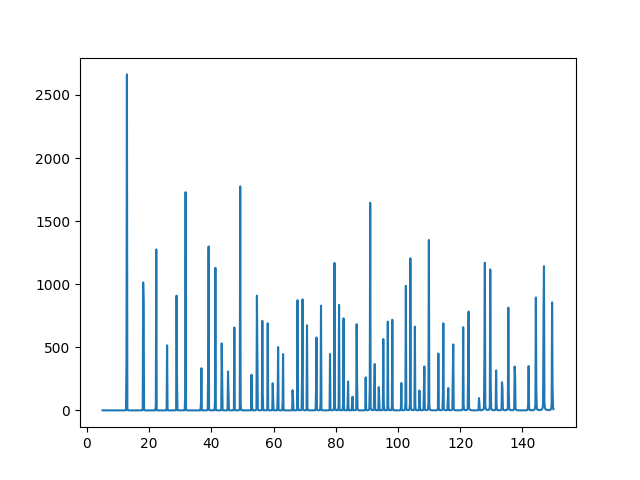

In [14]:
sample_new.parameters.wavelength = 1.56

%matplotlib notebook
plt.figure()
plt.plot(ttheta, interface.fit_func(ttheta))
plt.show()

We can see what interfaces are available and switch between

In [18]:
interfaces = interface.available_interfaces
print(interfaces)

['CrysFML', 'Cryspy']


In [15]:
interface.switch('CrysFML')
sample_new._updateInterface()

<IPython.core.display.Javascript object>


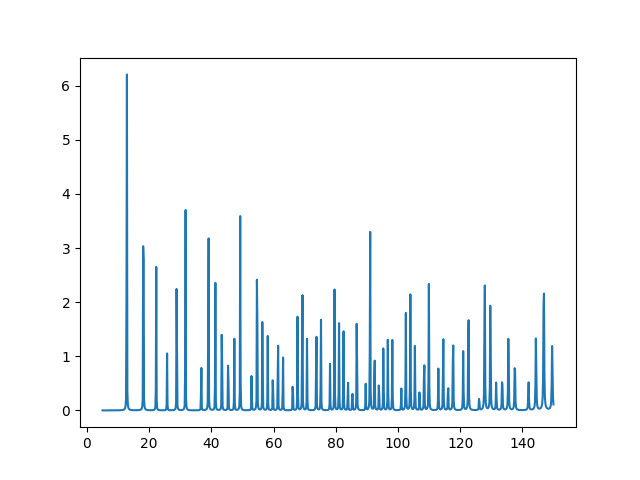

In [16]:
%matplotlib notebook
plt.figure()
plt.plot(ttheta, interface.fit_func(ttheta))
plt.show()